# BASEBALL PROJECT

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("C:\\Users\\diwak\\Downloads\\phase1_csvFiles\\baseball.csv")
data.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
data.shape

(30, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
# again checking for missing values
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<function matplotlib.pyplot.show(close=None, block=None)>

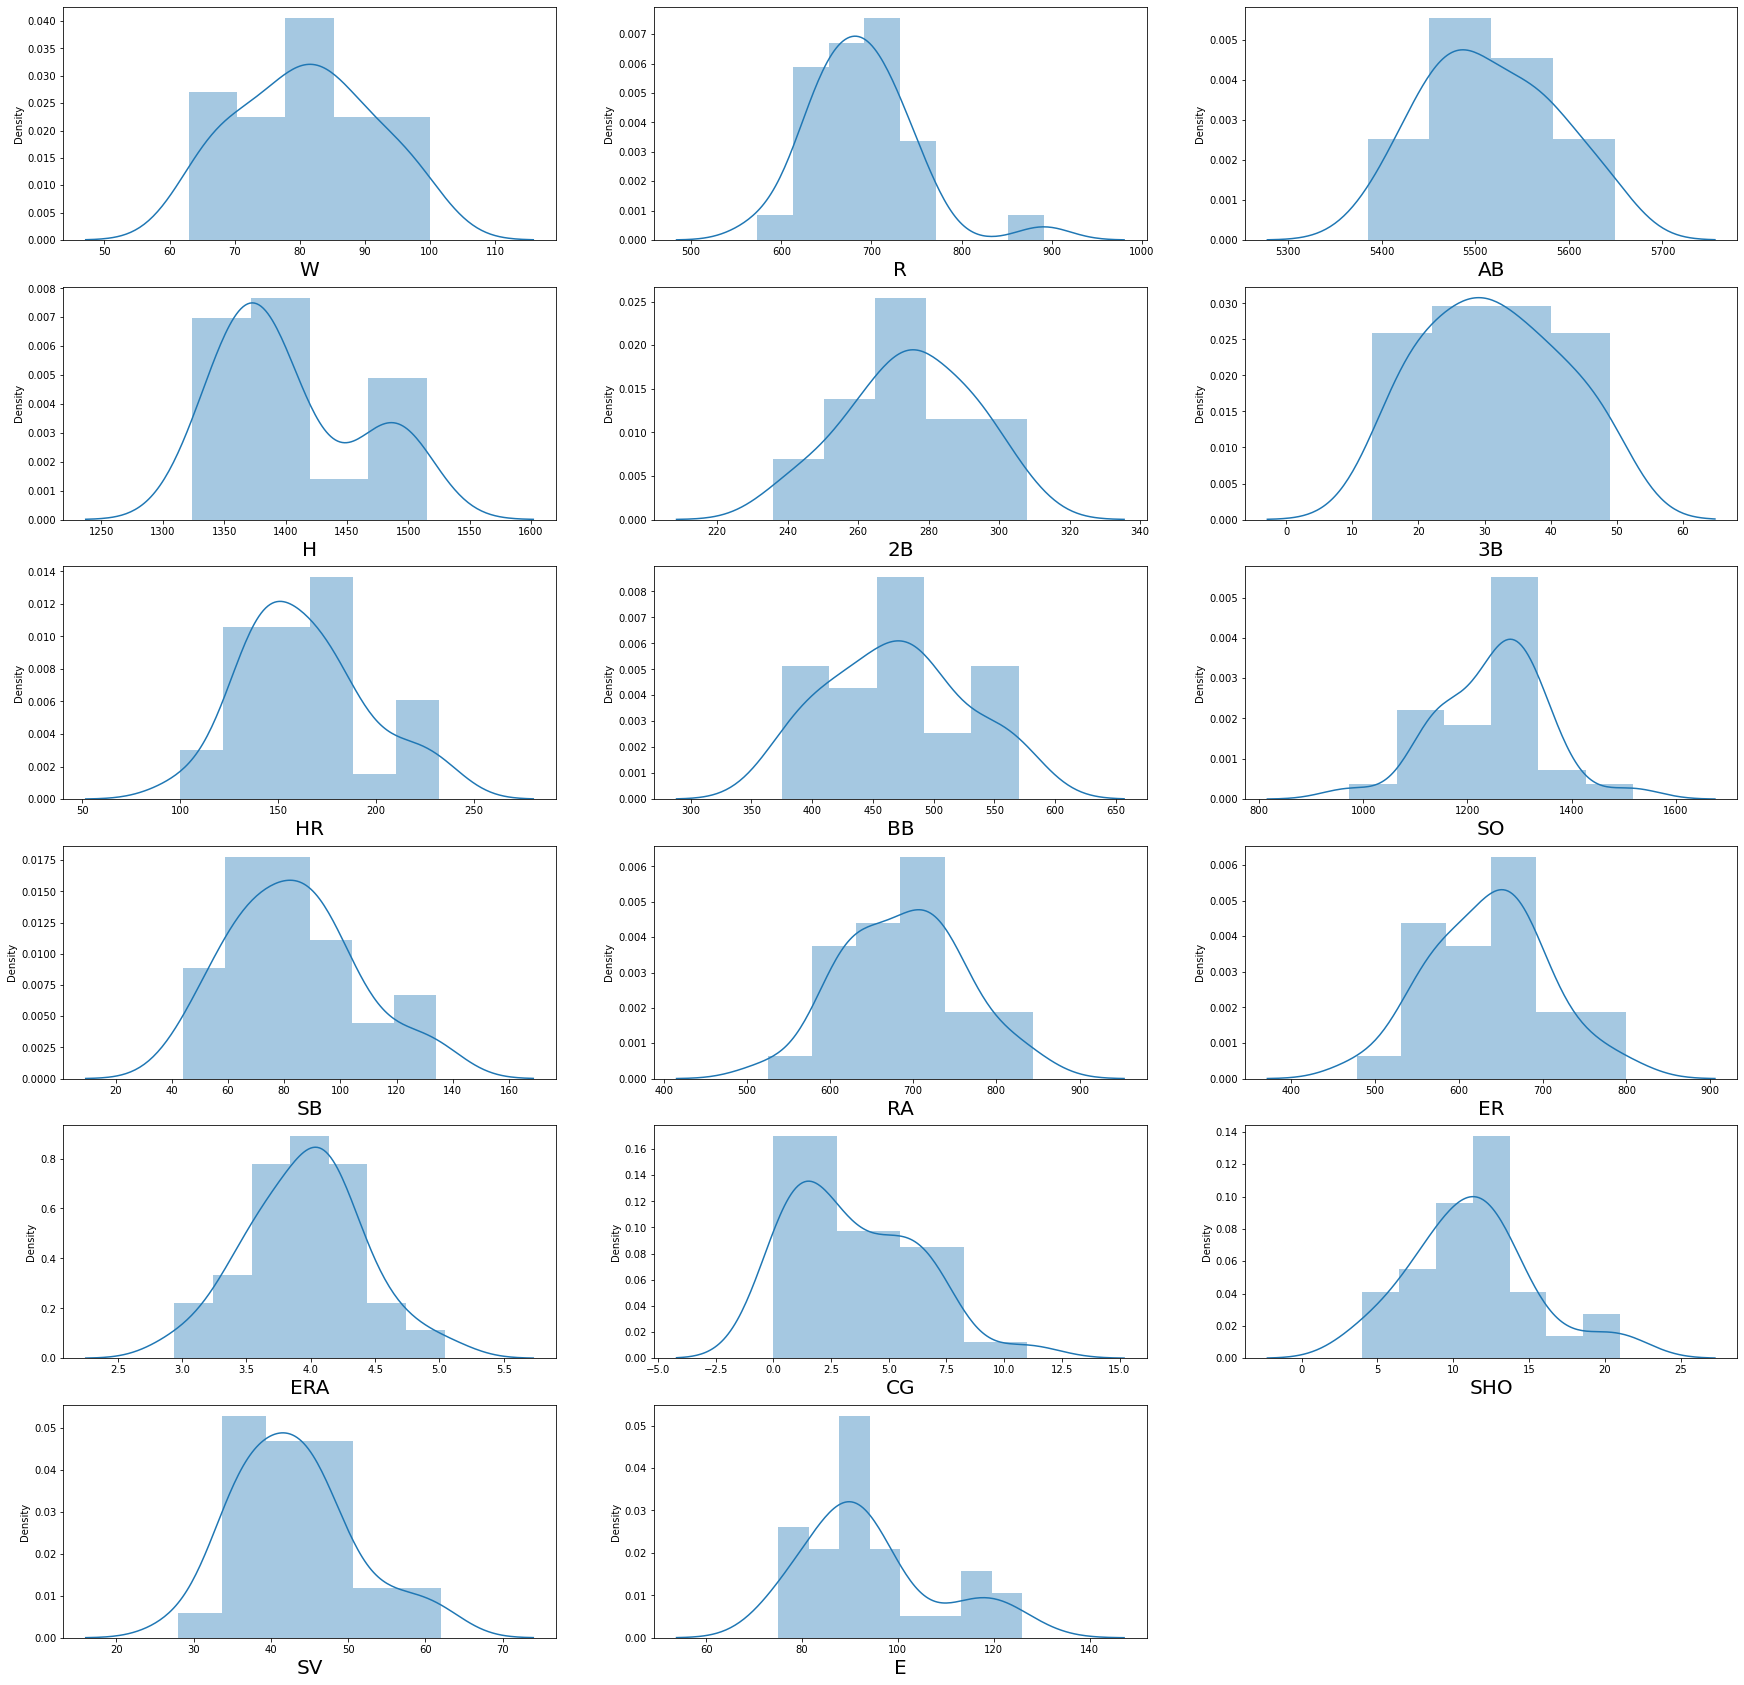

In [7]:
# Plotting graphs to visualize the data
plt.figure(figsize=(30,30))
plotnumber = 1
for column in data:
    if plotnumber <=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [8]:
# check skewness:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

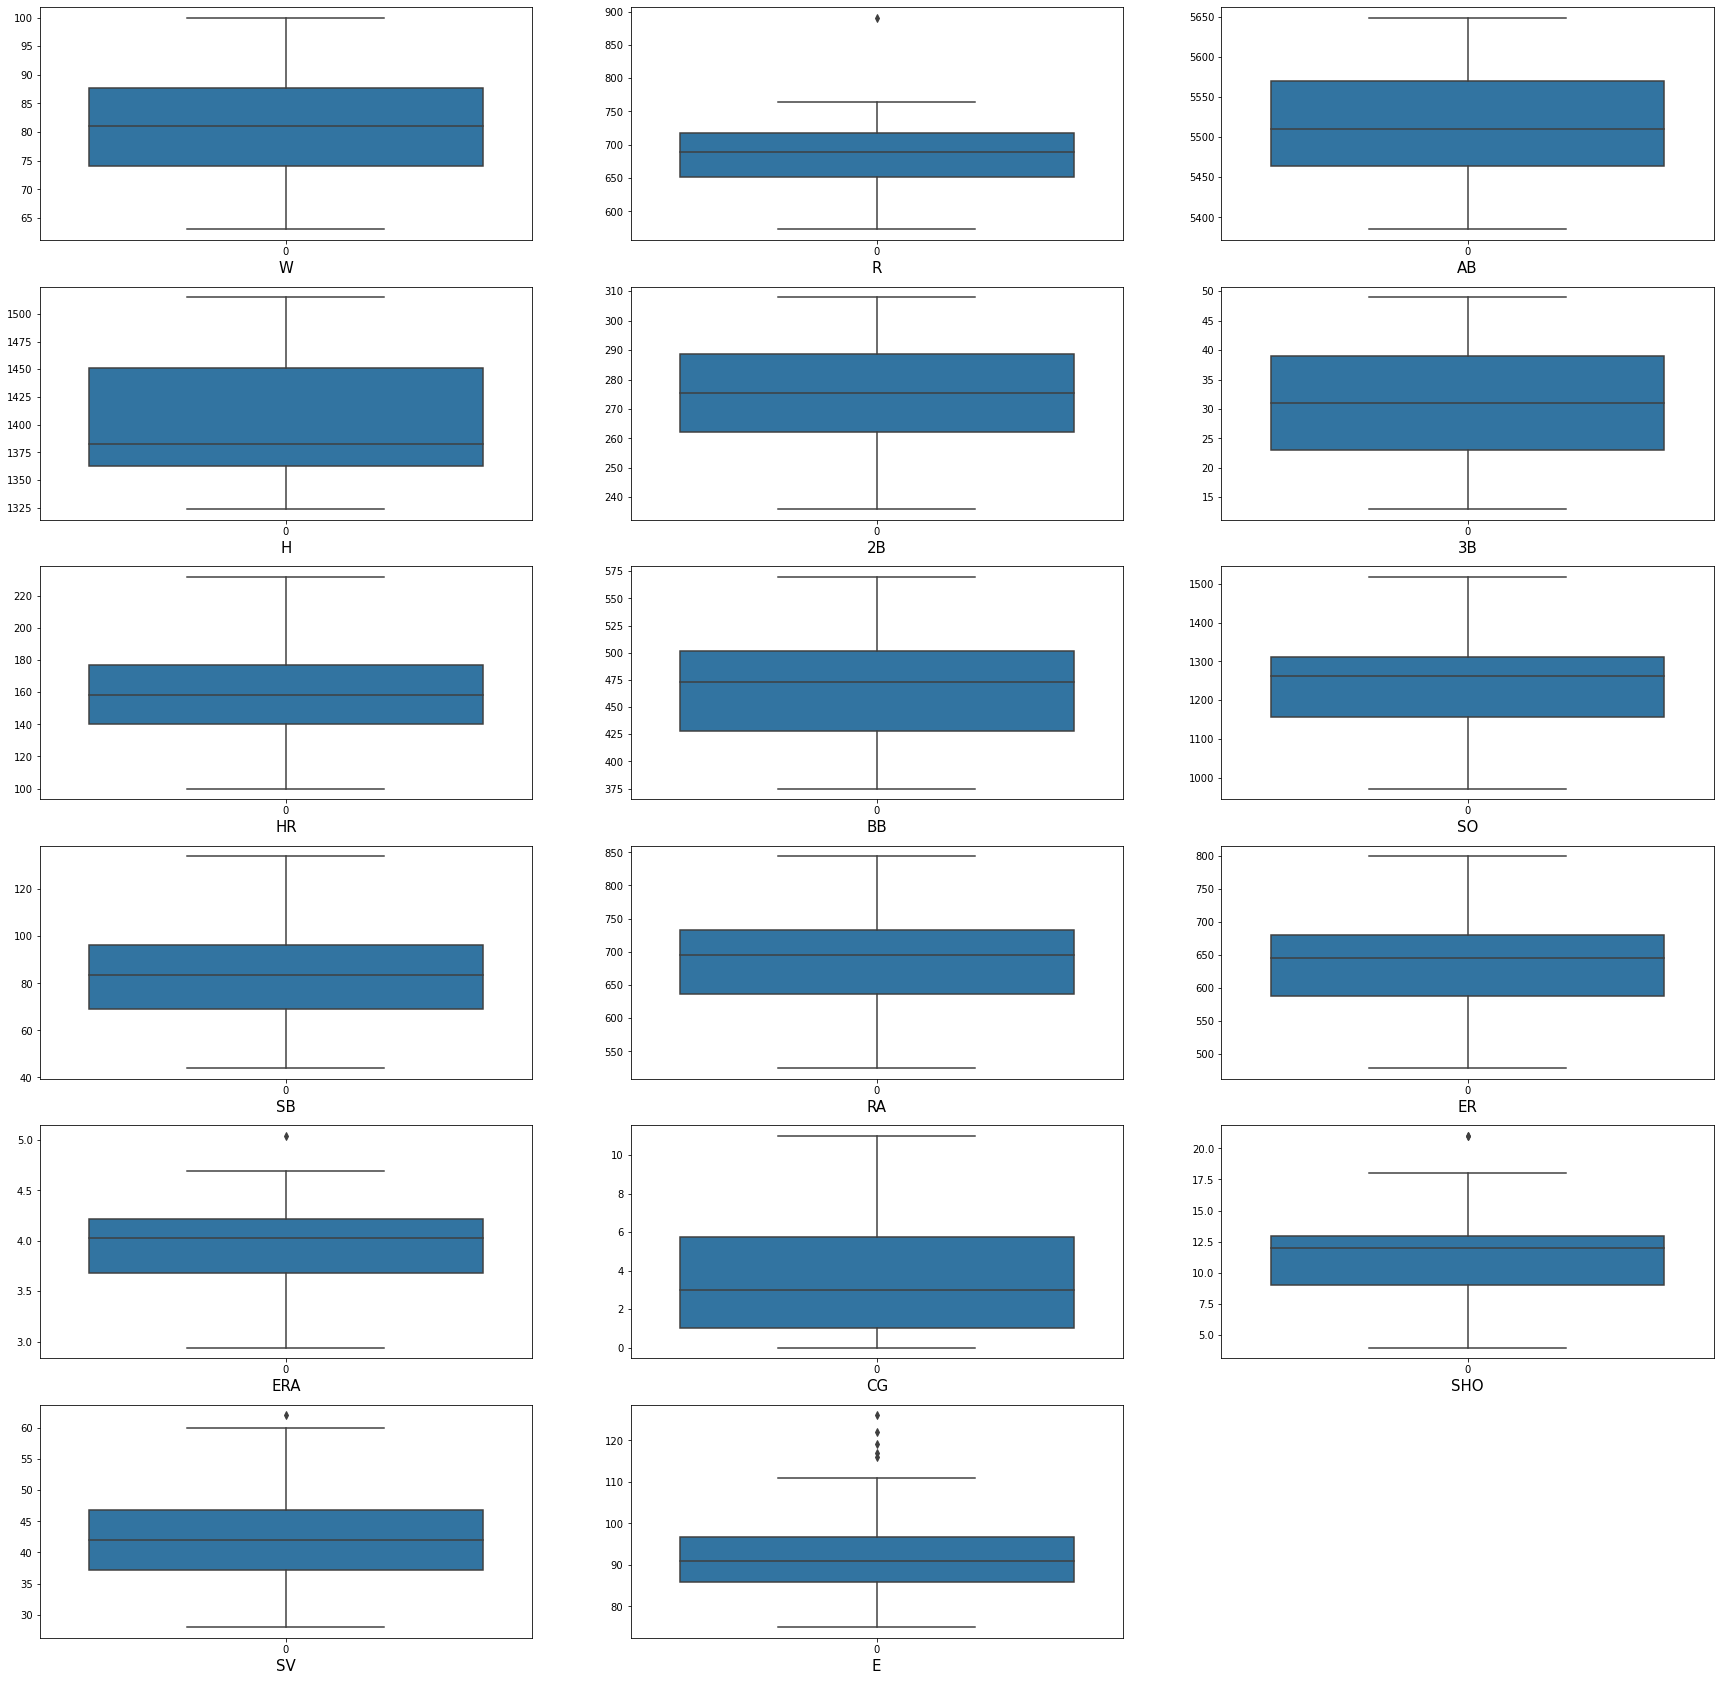

In [9]:
# Checking for outliers using boxplot
plt.figure(figsize=(30,30))
graph =1
for column in data:
    if graph <=17:
        plt.subplot(6,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

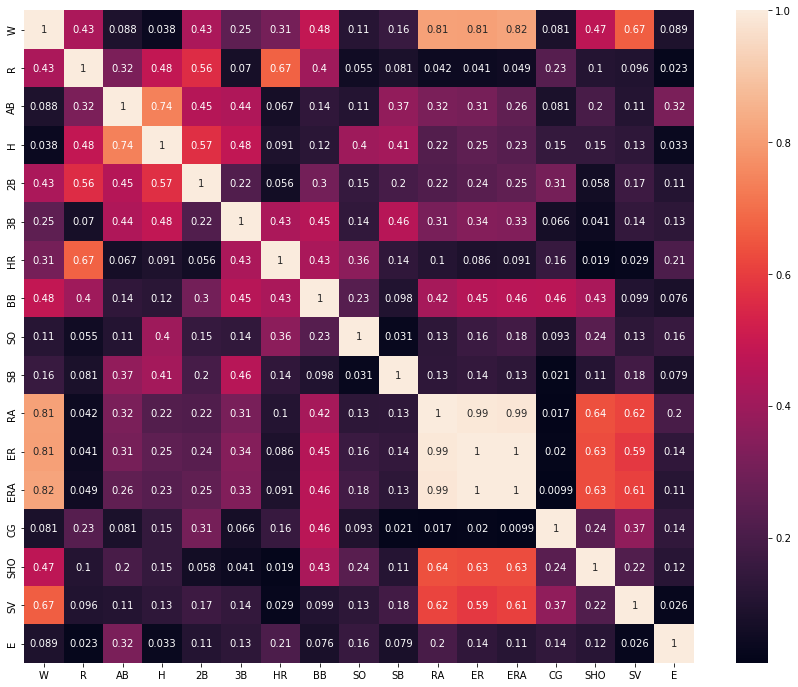

In [10]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(15,12))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [11]:
#Dividing data into features and label

X = data.drop(columns=['W'])
Y= data['W']

In [12]:
# Using Power Transform to Scale the data and also treat outliers
scaler = StandardScaler()

X_scaled =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [13]:
# Using Power Transform to Scale the data and also treat outliers
pt = PowerTransformer()

X_pt =  pd.DataFrame(pt.fit_transform(X_scaled), columns=X.columns)
X_pt

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.723244,0.862884,1.461016,1.485428,1.038395,-0.777511,-1.593503,-2.543124,0.940948,-0.662353,-0.501859,-0.505258,-0.442233,-0.813734,1.529364,-0.331538
1,0.273208,-0.691487,-1.092615,0.076119,1.217528,-0.142580,-0.511802,0.124310,-0.556940,0.174029,0.253392,0.256925,-0.442233,0.263305,0.377944,-0.539941
2,-0.237166,-1.138076,0.085384,1.679475,-0.186360,-0.699035,1.128963,-0.898428,0.213149,-0.676632,-0.750055,-0.640099,2.098834,-0.248363,-0.616578,-1.369919
3,-1.304238,0.292273,-0.226880,-0.844761,-0.387438,-0.896954,-1.181015,-0.199486,-0.661497,0.188083,0.108689,0.055534,1.257526,-0.525158,-0.779619,0.691123
4,0.149227,1.252884,1.625558,0.792057,1.658117,-0.321408,-0.215233,0.074660,0.078840,1.606388,1.590452,1.528006,1.257526,0.263305,-1.118967,-0.539941
5,2.709118,-0.052057,1.292423,2.007032,-1.433610,1.905625,1.727089,-0.953857,0.300112,-0.249607,-0.385250,-0.348054,1.257526,-0.248363,-1.294909,-0.331538
6,1.280579,0.756677,0.126479,-0.205574,-1.219769,1.443227,1.470611,-0.238131,-0.929730,0.145907,0.238932,0.167449,0.013002,-2.065087,0.726494,0.129414
7,0.553940,-0.412421,-0.501330,-1.547175,-1.113626,1.562087,-0.910334,0.806167,-2.026703,0.075531,0.152126,0.212193,-1.540878,-0.248363,0.122561,-1.634451
8,-0.779734,-0.412421,-0.179688,0.133780,0.108445,0.223917,-0.568131,0.589479,0.256871,-0.648077,-0.458116,-0.482792,-0.962189,0.263305,1.885590,0.288392
9,1.067004,1.694173,1.441897,1.103460,0.204733,0.028852,0.197663,-0.981513,-0.505278,0.914364,0.844494,0.792904,0.013002,-0.248363,-0.304850,0.433386


In [14]:
X_pt.skew()

R     -0.021440
AB     0.006064
H      0.083872
2B    -0.018357
3B     0.014252
HR    -0.038631
BB     0.026217
SO     0.103754
SB     0.037142
RA     0.005976
ER     0.032238
ERA    0.038398
CG     0.137257
SHO    0.009558
SV    -0.010548
E      0.007548
dtype: float64

In [15]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_pt,i) for i in range(X_pt.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,9.670946,R
1,12.959789,AB
2,7.045133,H
3,3.725630,2B
4,3.332207,3B
5,11.150844,HR
6,3.359582,BB
7,2.810597,SO
8,2.175158,SB
9,241.593423,RA


In [16]:
X_pt= X_pt.drop(columns=['ER','ERA'])
X_pt

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.723244,0.862884,1.461016,1.485428,1.038395,-0.777511,-1.593503,-2.543124,0.940948,-0.662353,-0.442233,-0.813734,1.529364,-0.331538
1,0.273208,-0.691487,-1.092615,0.076119,1.217528,-0.142580,-0.511802,0.124310,-0.556940,0.174029,-0.442233,0.263305,0.377944,-0.539941
2,-0.237166,-1.138076,0.085384,1.679475,-0.186360,-0.699035,1.128963,-0.898428,0.213149,-0.676632,2.098834,-0.248363,-0.616578,-1.369919
3,-1.304238,0.292273,-0.226880,-0.844761,-0.387438,-0.896954,-1.181015,-0.199486,-0.661497,0.188083,1.257526,-0.525158,-0.779619,0.691123
4,0.149227,1.252884,1.625558,0.792057,1.658117,-0.321408,-0.215233,0.074660,0.078840,1.606388,1.257526,0.263305,-1.118967,-0.539941
5,2.709118,-0.052057,1.292423,2.007032,-1.433610,1.905625,1.727089,-0.953857,0.300112,-0.249607,1.257526,-0.248363,-1.294909,-0.331538
6,1.280579,0.756677,0.126479,-0.205574,-1.219769,1.443227,1.470611,-0.238131,-0.929730,0.145907,0.013002,-2.065087,0.726494,0.129414
7,0.553940,-0.412421,-0.501330,-1.547175,-1.113626,1.562087,-0.910334,0.806167,-2.026703,0.075531,-1.540878,-0.248363,0.122561,-1.634451
8,-0.779734,-0.412421,-0.179688,0.133780,0.108445,0.223917,-0.568131,0.589479,0.256871,-0.648077,-0.962189,0.263305,1.885590,0.288392
9,1.067004,1.694173,1.441897,1.103460,0.204733,0.028852,0.197663,-0.981513,-0.505278,0.914364,0.013002,-0.248363,-0.304850,0.433386


In [17]:
#Again Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1= pd.DataFrame()
vif1['vif']=[variance_inflation_factor(X_pt,i) for i in range(X_pt.shape[1])]
vif1['feature']= X_pt.columns
vif1

,vif,feature
0,7.354611,R
1,3.840954,AB
2,5.442412,H
3,3.225646,2B
4,2.892801,3B
5,6.405492,HR
6,2.953937,BB
7,2.250114,SO
8,1.934878,SB
9,4.395194,RA


In [18]:
#traintestsplit
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split (X_pt,Y, test_size=0.25, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  408 the model performs well
Acuraccy of training model : 90.54278617885207
Accuracy of testing model : 90.6448025225619

-----------------------------------------



In [19]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_pt,Y, test_size=0.25, random_state = 408)

In [20]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)
    
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [21]:
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9054278617885206
Accuracy of testing model : 0.9064480252256191
RMSE :  3.9316665781651157

-----------------------------------------



In [22]:
# Cross validation
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy= r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range (2,10):
    cv_score=cross_val_score(lr,X_scaled,Y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv_score is {cv_mean}, training accuracy is {Train_accuracy} and testing accuracy is {Test_accuracy}")
    print ("\n")

At cross fold 2 the cv_score is -0.9911855504647521, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 3 the cv_score is 0.22588460167738647, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 4 the cv_score is 0.2495216665436925, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 5 the cv_score is 0.04075540667455595, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 6 the cv_score is 0.25153530937186797, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 7 the cv_score is 0.389080464428948, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 8 the cv_score is 0.3193702210966787, training accuracy is 0.9054278617885206 and testing accuracy is 0.9064480252256191


At cross fold 9 the cv_score is -4.809

<function matplotlib.pyplot.show(close=None, block=None)>

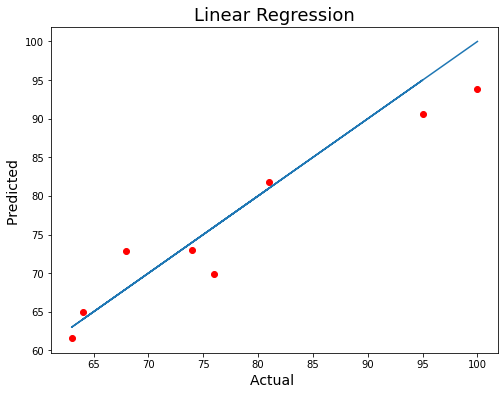

In [23]:
# Linear regression Graph:
plt.figure (figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color = 'r')
plt.plot(y_test,y_test)
plt.xlabel("Actual ", fontsize =14)
plt.ylabel("Predicted ", fontsize=14)
plt.title ("Linear Regression", fontsize = 18)
plt.show

In [24]:
#Regularisation
from sklearn.linear_model import Lasso

#Hyperparameter Tuining

parameters = {'alpha':[0.001, 0.01, 0.1,1,10],
             'random_state':list (range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [25]:
# Lasso Training
ls= Lasso(alpha=1, random_state=0)
model_selection(ls,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8319025895409037
Accuracy of testing model : 0.8478238779628375
RMSE :  5.01445175614785

-----------------------------------------



In [26]:
#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.6429314420803782
RMSE :  7.681145747868608

-----------------------------------------



In [27]:
# Hyperparameter Tuning :

parameters = {'max_features':['auto','sqrt','log2'],
    'max_depth': range(5,8),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [28]:
dt1 = DecisionTreeRegressor(max_depth =5, min_samples_leaf = 3, min_samples_split = 3, max_features="sqrt")
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.6295078511961218
Accuracy of testing model : 0.2358127659574467
RMSE :  11.236992480196827

-----------------------------------------



In [29]:
#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.916097960796712
Accuracy of testing model : 0.5701840945626477
RMSE :  8.427357978631262

-----------------------------------------



In [30]:
# Hyperparameter Tuning:
parameters = {'n_estimators':range(25,30),
    'max_features':['auto','sqrt','log2'],
    'max_depth': range(5,10),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,5)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 26}


In [31]:
rf1= RandomForestRegressor(n_estimators=29,max_features='sqrt', max_depth = 9, min_samples_leaf = 2, min_samples_split = 4)
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8067157400616194
Accuracy of testing model : 0.3534808291366134
RMSE :  10.335724025104865

-----------------------------------------



In [32]:
#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.1846959812017669
Accuracy of testing model : -0.06699476338214816
RMSE :  13.277959664636812

-----------------------------------------



In [33]:
# Hyperparameter Tuning :

parameters = {'kernel':['linear','rbf','sigmoid'],
    'gamma': ['scale','auto']
    }

clf = GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [34]:
svr1 = SVR(kernel='linear',gamma='scale')
model_selection(svr1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8411994016481179
Accuracy of testing model : 0.8269347532432376
RMSE :  5.347553448267199

-----------------------------------------



In [35]:
# Saving Model
import pickle
filename= 'Baseball.pkl'
pickle.dump(lr,open(filename, 'wb'))

In [36]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (lr.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,100,93.835860
1,64,64.970090
2,68,72.830734
3,74,72.981894
4,81,81.865024
5,63,61.609659
6,95,90.556822
7,76,69.841214
